reference = https://dafriedman97.github.io/mlbook/content/c1/construction.html

In [19]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.datasets import load_diabetes 
diab = load_diabetes()


In [21]:
X = diab['data']
y = diab['target']

use Loss func and estimate parameter(B).
use an in-sample prediction to use in the loss func

In [23]:
class LinearRegression:

    def fit(self, X, y, intercept = False):

        # record data and dimensions
        if intercept == False: # add intercept (if not already included)
            ones = np.ones(len(X)).reshape(len(X), 1) # column of ones 
            X = np.concatenate((ones, X), axis = 1)
        self.X = np.array(X)
        self.y = np.array(y)
        self.N, self.D = self.X.shape
        
        # estimate parameters
        XtX = np.dot(self.X.T, self.X)
        XtX_inverse = np.linalg.inv(XtX)
        Xty = np.dot(self.X.T, self.y)
        self.beta_hats = np.dot(XtX_inverse, Xty)
        
        # make in-sample predictions
        self.y_hat = np.dot(self.X, self.beta_hats)
        
        # calculate loss
        self.L = .5*np.sum((self.y - self.y_hat)**2)
        
    def predict(self, X_test, intercept = True):
        
        # form predictions
        self.y_test_hat = np.dot(X_test, self.beta_hats)

In [24]:
model = LinearRegression() # instantiate model
model.fit(X, y, intercept = False) # fit model

In [25]:
sns.set()

The closer the points lie to the 45-degree line, the more accurate the fit. 

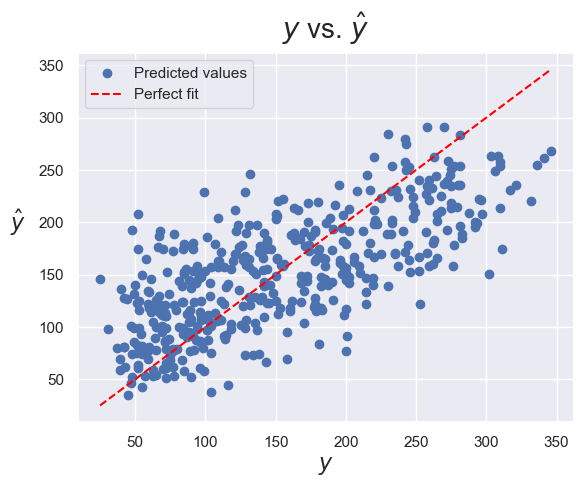

In [26]:
fig, ax = plt.subplots()
plt.scatter(model.y, model.y_hat, label='Predicted values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red', label='Perfect fit') 
ax.set_xlabel(r'$y$', size = 16)
ax.set_ylabel(r'$\hat{y}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$y$ vs. $\hat{y}$', size = 20, pad = 10)
plt.legend()
plt.show()

USING GRADIENT-DESCENT

In [27]:
class LinearRegression2:
    
    def __init__(self,lr = 0.001,n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self,X,y):
        self.bias = 0
        n_samples,n_features  = X.shape
        self.weights = np.zeros(n_features)
        
        for _ in range(self.n_iters):
            y_pred = np.dot(X,self.weights) + self.bias
            
            dw = (1/n_samples) * np.dot(X.T,(y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)
            
            self.weights -= self.lr*dw
            self.bias -= self.lr*db

    def predict(self,X):
        return np.dot(X,self.weights) + self.bias        

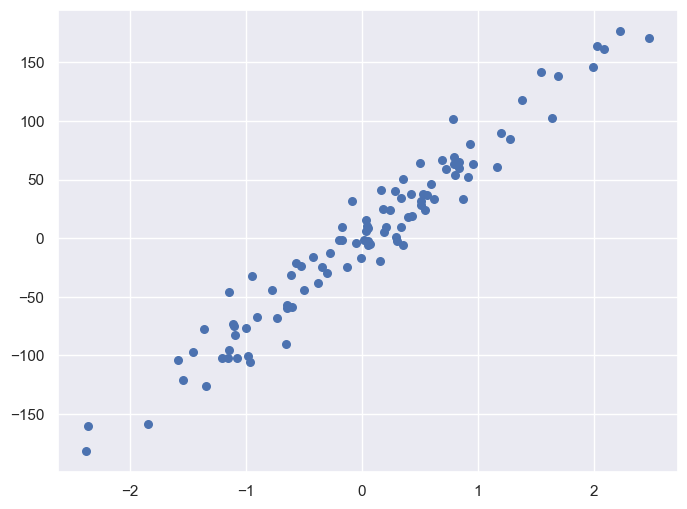

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

In [36]:
model = LinearRegression2(lr=0.01)
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [37]:
def mse(y_test,prediction):
    return np.mean((y_test-prediction)**2)

In [38]:
print(mse(y_test,prediction))

305.7719958301902


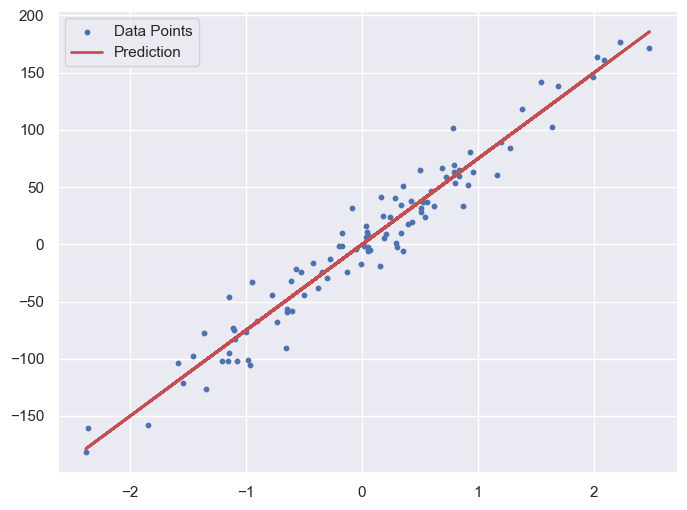

In [40]:
y_pred_line = model.predict(X)
fig = plt.figure(figsize=(8,6))
plt.scatter(X, y, color='b', s=10,label='Data Points')
plt.plot(X, y_pred_line, color='r', linewidth=2, label='Prediction')
plt.legend()
plt.show()